In this notebook, we will cover:

* [Getting started with visualization](#Getting-Started)
* [Aesthetic mappings](#Aesthetic-Mappings)
* [Facets](#Facets)
* [Geometric Objects](#Geometric-Objects)

Data visualization is an important skill to have for a data scientist. There are several tools available for data visualization. There are paid services/products offered by companies like [Tableau](https://www.tableau.com/) that let people generate high quality visualizations from data stored in speadsheets and databases. [D3.js](https://d3js.org/) is a Javascript library that uses a browser to display high quality, interactive graphics. Spreadsheet programs, such as Microsoft Excel, also offer visualization tools.

Since this is a course based on the R language, we will explore the visualization tools provided by the R language and packages. Even if we restrict ourselves to R, we have a few choices. The [R base graphics package](https://stat.ethz.ch/R-manual/R-devel/library/graphics/html/00Index.html) provides basic plotting tools that may be sufficient for many purposes. We will look at the [ggplot2 package](http://ggplot2.org/) that offers a higher level of abstraction to create graphics. For an interesting comparison between base R graphics and ggplots, see this [blog post](https://flowingdata.com/2016/03/22/comparing-ggplot2-and-r-base-graphics/).

Let us start by revisiting the **mpg** data set that we saw in the last lecture.

# Getting Started

In [1]:
options(repr.plot.width=6, repr.plot.height=4)
library(tidyverse)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats


Recall the **mpg** data frame.

In [2]:
print(mpg)

# A tibble: 234 × 11
   manufacturer      model displ  year   cyl      trans   drv   cty   hwy    fl
          <chr>      <chr> <dbl> <int> <int>      <chr> <chr> <int> <int> <chr>
1          audi         a4   1.8  1999     4   auto(l5)     f    18    29     p
2          audi         a4   1.8  1999     4 manual(m5)     f    21    29     p
3          audi         a4   2.0  2008     4 manual(m6)     f    20    31     p
4          audi         a4   2.0  2008     4   auto(av)     f    21    30     p
5          audi         a4   2.8  1999     6   auto(l5)     f    16    26     p
6          audi         a4   2.8  1999     6 manual(m5)     f    18    26     p
7          audi         a4   3.1  2008     6   auto(av)     f    18    27     p
8          audi a4 quattro   1.8  1999     4 manual(m5)     4    18    26     p
9          audi a4 quattro   1.8  1999     4   auto(l5)     4    16    25     p
10         audi a4 quattro   2.0  2008     4 manual(m6)     4    20    28     p
# ... with 224 more

A fundamental type of plot is a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). It can be used to examine the relationship between 2 variables. Cartesian coordinates are used with one variable plotted along the x-axis and the other plotted along the y-axis. Let us create a scatter plot of the engine displacement **displ** (in liters) versus the highway mileage **hwy** (in mpg).

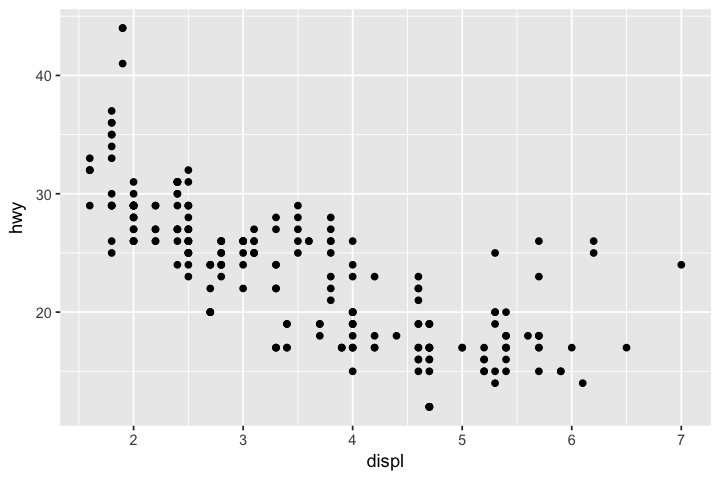

In [3]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

# Aesthetic Mappings

Let us pay close attention to the syntax here. It has the form:

```r
ggplot(data = <DATA>) +
    <GEOM_FUNCTION>(mapping = aes(<MAPPINGS>))
```

Scatter plots are useful for visualizing relationships between **continuous** variables, e.g., highway mileage and engine displacement above. Using them for **categorical** variables is not always very useful.

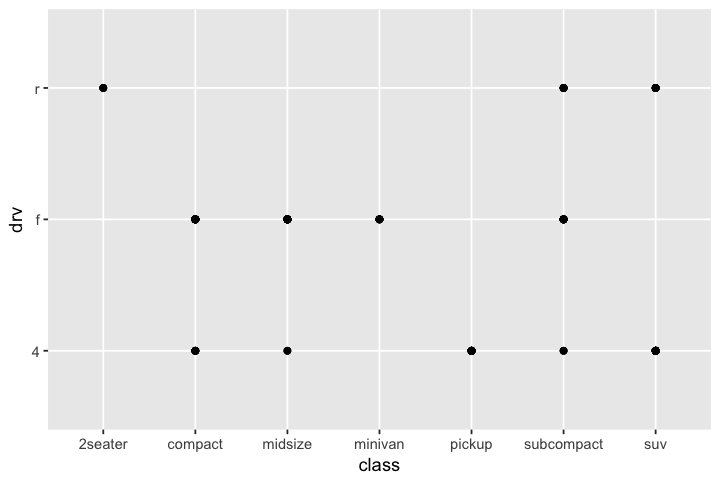

In [4]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = class, y = drv))

We can select a third variable and map to some **aesthetic** (i.e., visual property) of the points. Some examples are color, shape, size, and transparency.

Let us map the **class** variable to the **color** aesthetic in our **hwy** vs **displ** scatter plot.

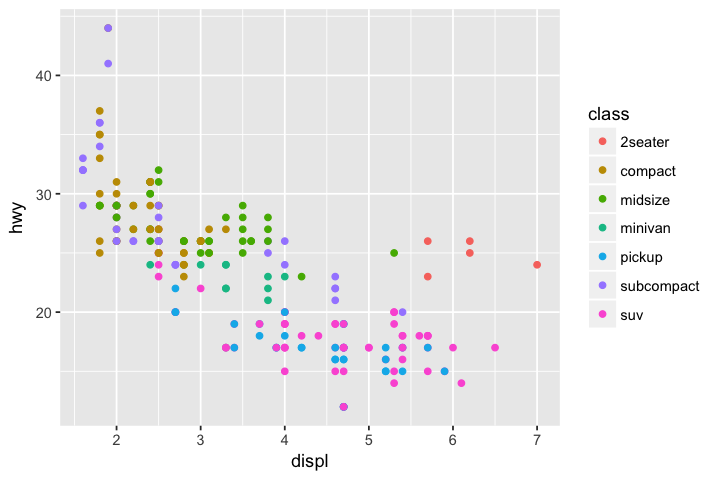

In [5]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = class))

Note what ggplot did for us. It chose a unique value of **color** for a unique value of **class** and also displayed a legend explaining the choices.

Lets now map the **class** variable to the **shape** aesthetic.

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

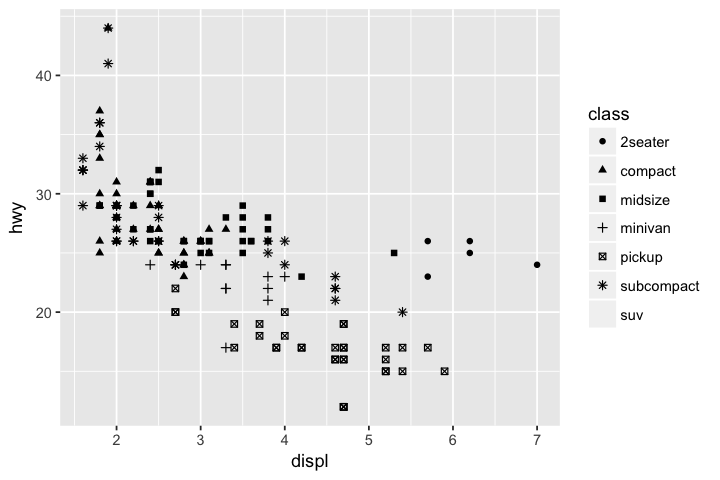

In [6]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, shape = class))

We get a warning since, by default, only 6 shapes are used at a time but the **class** variable takes 7 values. In our case, points with SUV class went unplotted.

If we try to map a categorical variable **class** to a continuous aesthetic **size**, we get a warning.

Warning message:
“Using size for a discrete variable is not advised.”

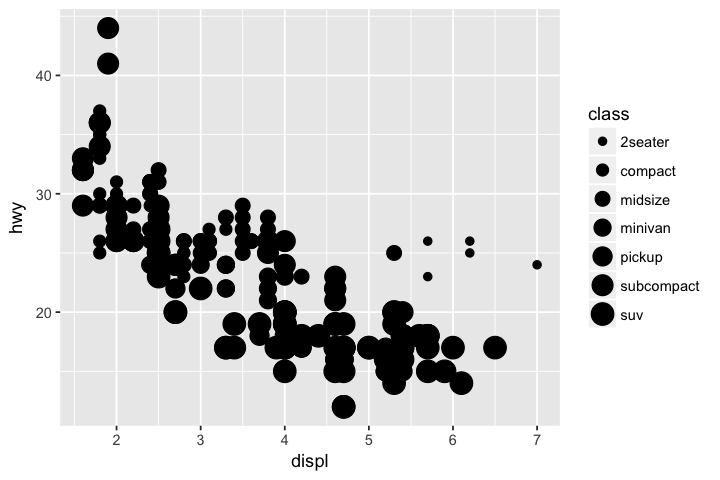

In [7]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, size = class))

Next, let us map a continuous variable **cty** to a continuous aesthetic **size**.

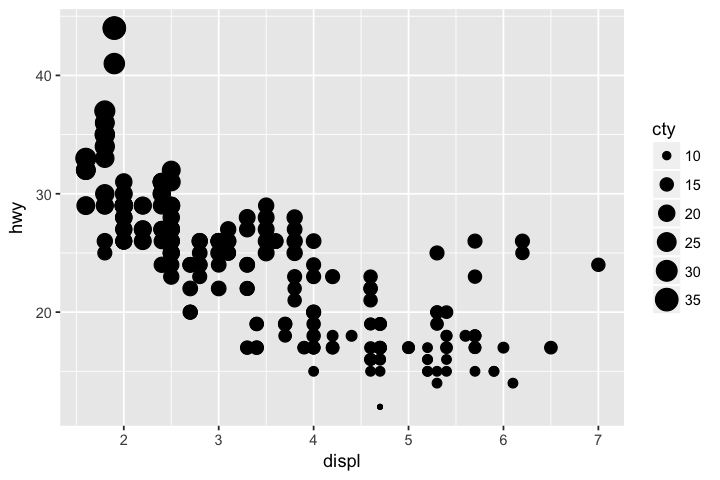

In [8]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, size = cty))

**color** is an interesting aesthetic. It works even when we map a continuous variable to it but it works differently for continuous and categorical variables.

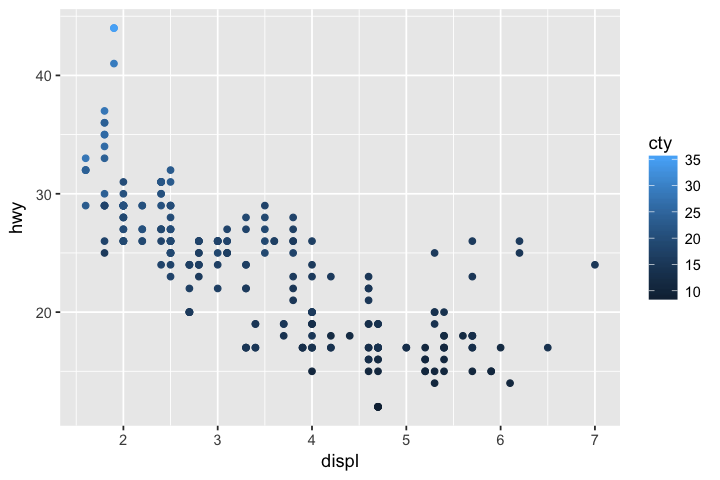

In [9]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = cty))

An aesthetic need not be mapped directly to a variable. For example, we can map the color aesthetic to TRUE/FALSE depending on whether the **year** variable has a value less than 2000 or not.

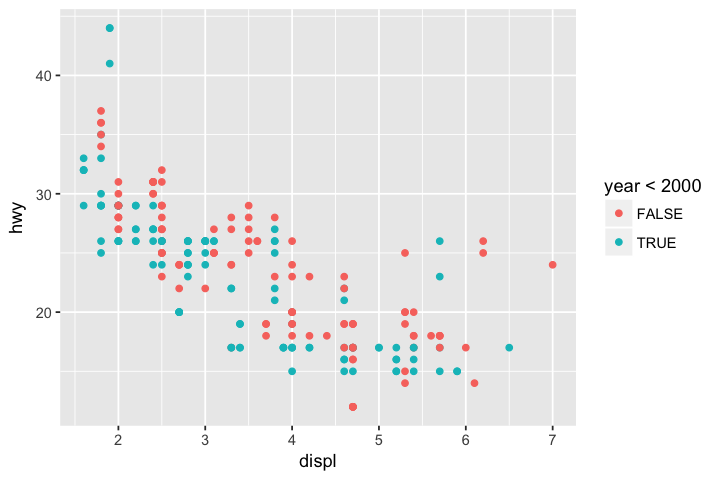

In [10]:
ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy, color = year < 2000))

# Facets

We already saw how to add a third variable to a scatter plot: using aesthetics. **Facets** provide another way to add a third variable.

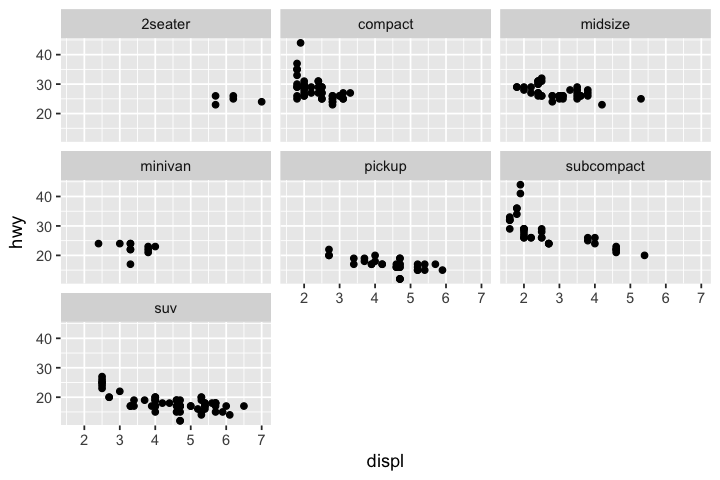

In [11]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class) # The ~ operator creates an R formula

You should facet on a discrete variable. If you facet on a continuous variable, e.g., **cty**, R will discretize it first.

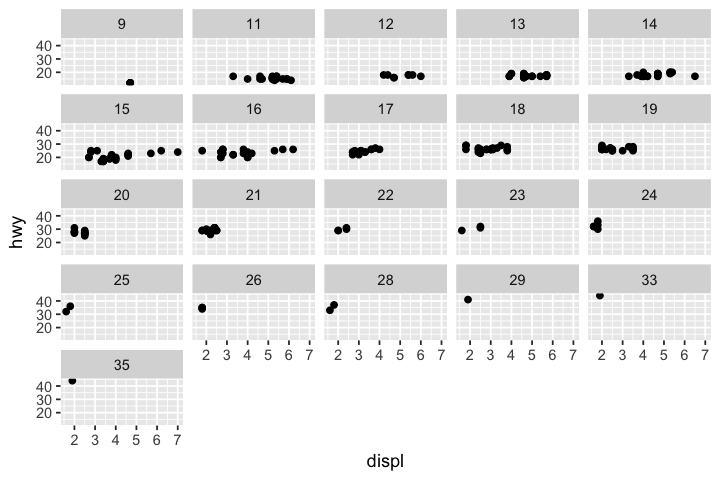

In [12]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ cty) 

You can facet on a combination of variables by modifying the formula to include more variables.

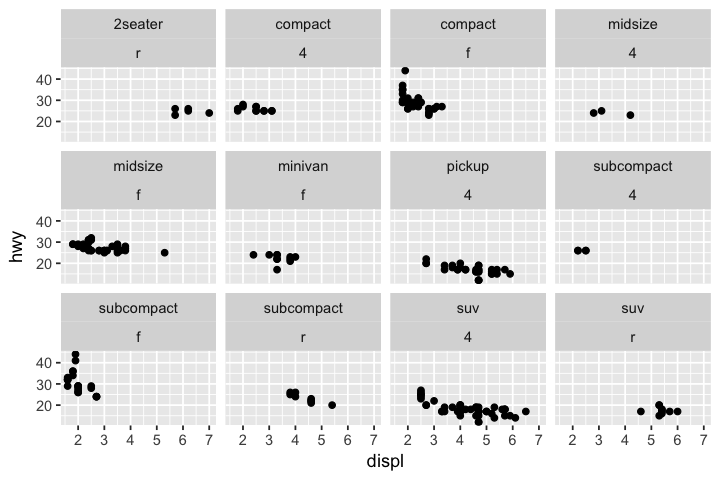

In [13]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class + drv) # The ~ operator creates an R formula

There is another way to facet on two variables: use a 2d grid

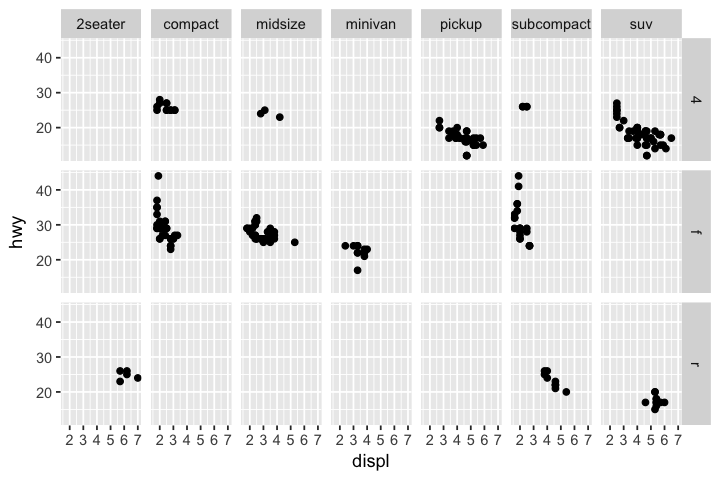

In [14]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ class) # Now we use a 2-sided formula of the form Y ~ X 

It is possible to leave out the Y axis or the X axis in `facet_grid`

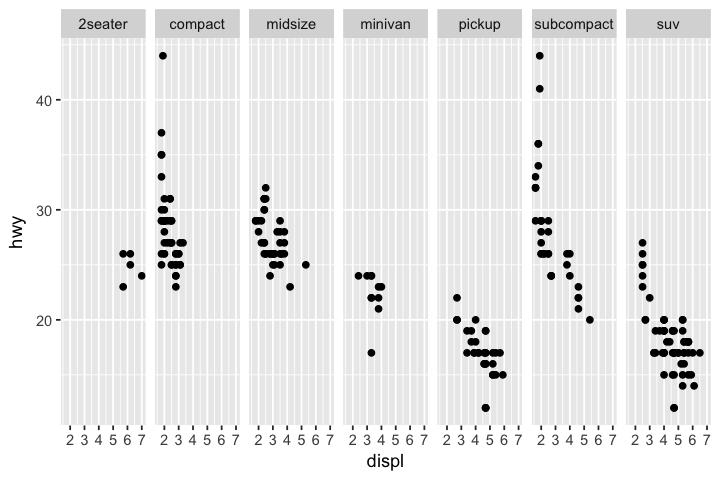

In [15]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(. ~ class) # No Y

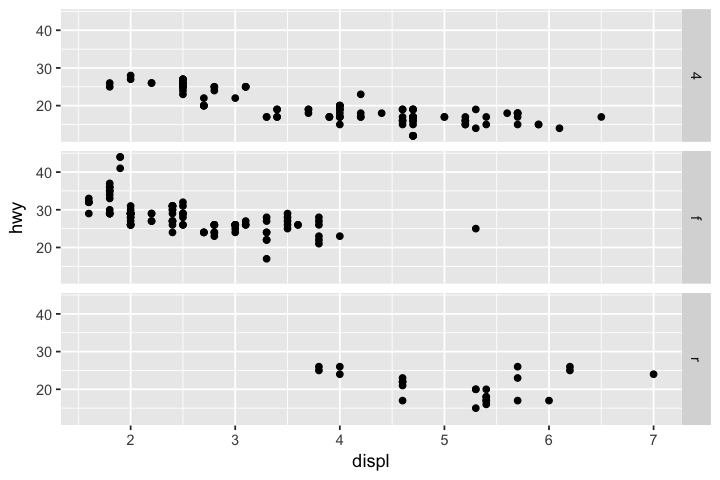

In [16]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_grid(drv ~ .) # No X

Note the difference between `facet_wrap(~ class)` and `facet_grid(. ~ class)`. The former will wrap a 1d grid over multiple rows whereas the latter will not wrap around. You can control the number of rows in `facet_wrap` using `nrow`. 

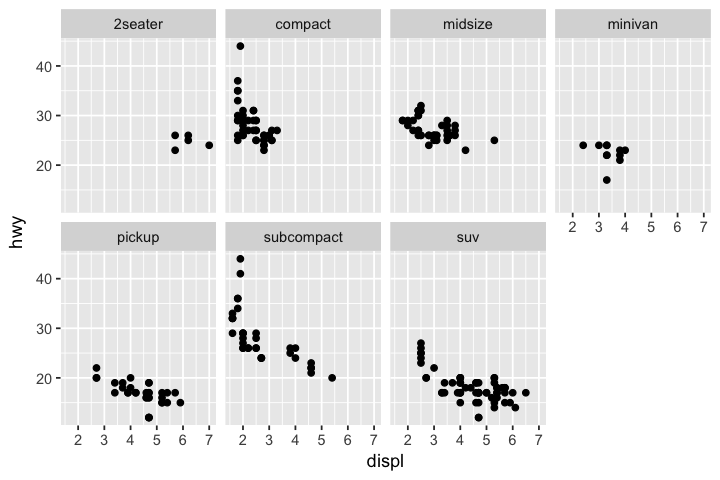

In [17]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) + 
  facet_wrap(~ class, nrow = 2) # Use only 2 rows

# Geometric Objects

Let us go back to our favorite scatter plot: highway mileage vs engine displacement 😀

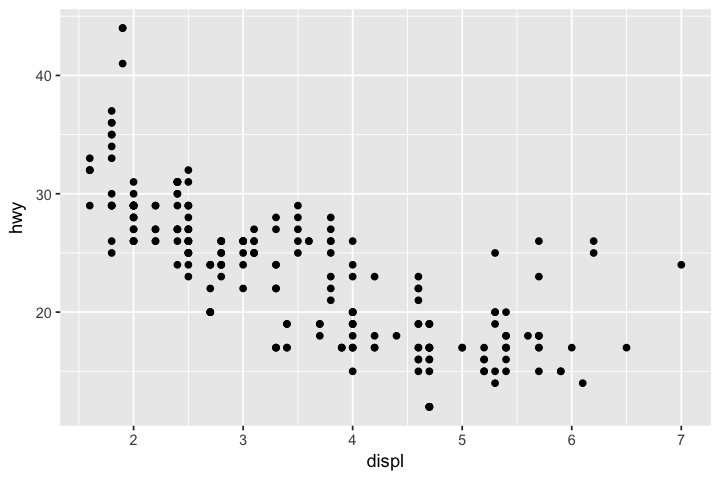

In [18]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

Instead of the point **geom** (i.e., a ggplot geometrical object) specified by `geom_point`, let us use a smooth geom using `geom_smooth`,

`geom_smooth()` using method = 'loess'


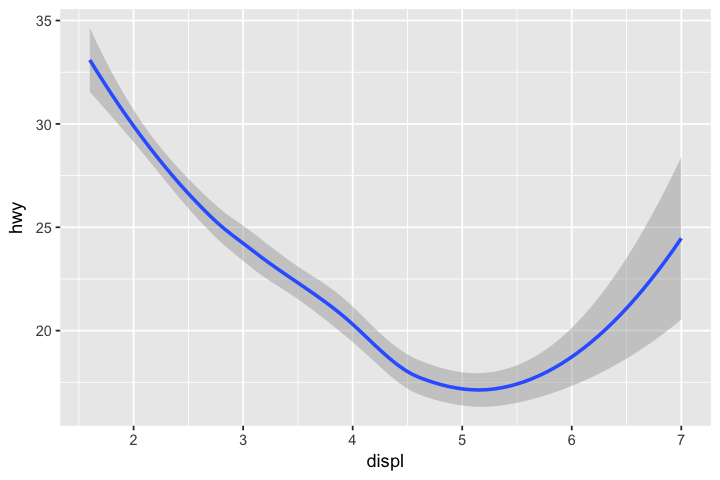

In [19]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))

Note that the two plots above use exactly the same data but display them using different **geoms**.

The list of available aesthetic mappings can vary from geom to geom. E.g., `geom_point` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `shape`
* `size`
* `stroke`

`geom_smooth` has the following aesthetics:

* `x` (required)
* `y` (required)
* `alpha`
* `color`
* `fill`
* `group`
* `linetype`
* `size`
* `weight`
* `ymax`
* `ymin`

Let us map the **linetype** aesthetic to the **drv** variable.

`geom_smooth()` using method = 'loess'


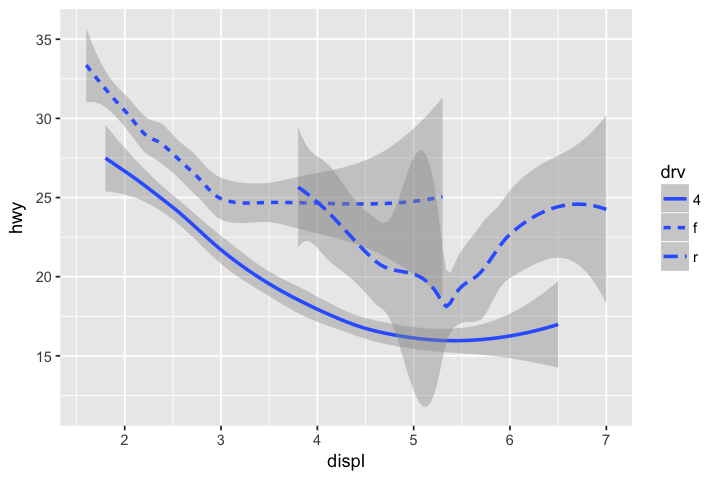

In [20]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, linetype = drv))

The aesthetic **group** needs some explanation. Note that in `geom_point`, individual rows of our data set get plotted individually as points. In contrast, in `geom_smooth` the individual rows are not plotted separately. Instead, the gemoetric object created by `geom_smooth` corresponds to multiple rows of data.

`geom_smooth()` using method = 'loess'


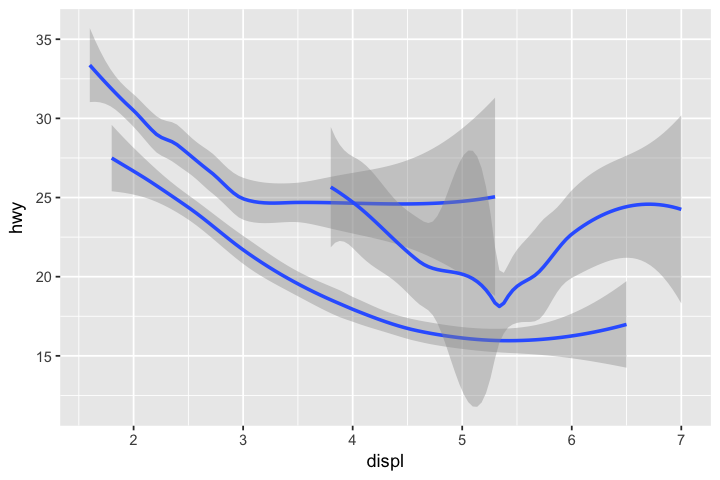

In [21]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv))

Contrast the above plot with the plot we get when we map the **color** aesthetic to the **drv** variable.

`geom_smooth()` using method = 'loess'


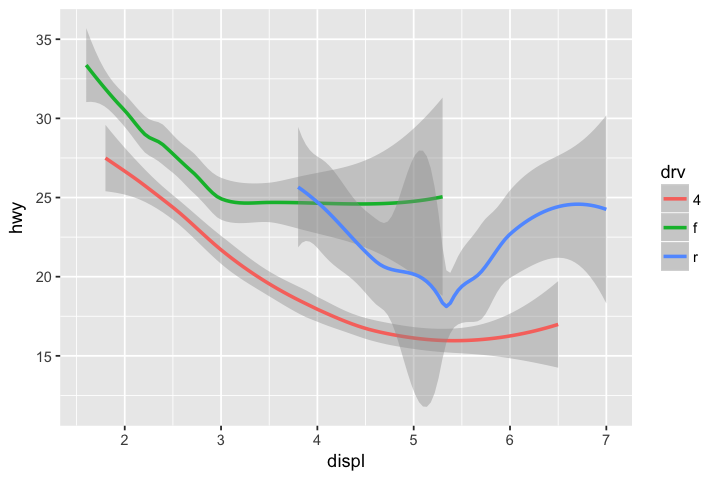

In [22]:
ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy, color = drv))

Now here's a cool thing: we can use multiple geometries in the same plot. This shows the power of the layered approach adopted by `ggplot`.

`geom_smooth()` using method = 'loess'


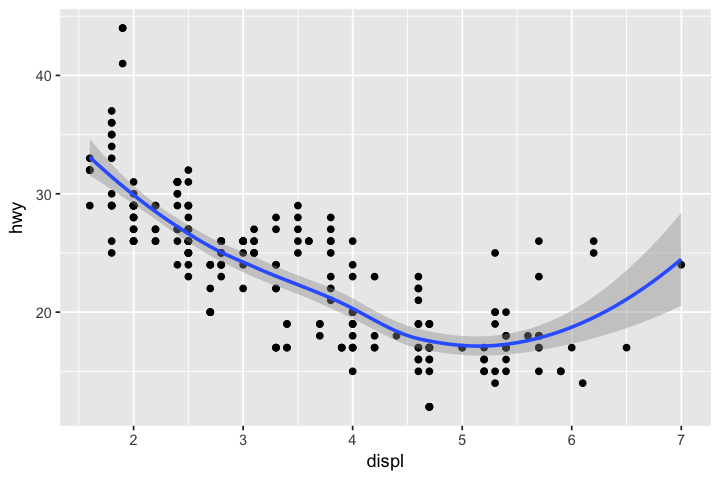

In [23]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy)) +
    geom_smooth(mapping = aes(x = displ, y = hwy))

There's a bit of code duplication above. We are specifying the `x` and `y` mappings twice. This can lead to bugs. E.g., in the code below, I changed the **y** variable to map to **cty** in the point geom but forgot to make that change for the smooth geom.

`geom_smooth()` using method = 'loess'


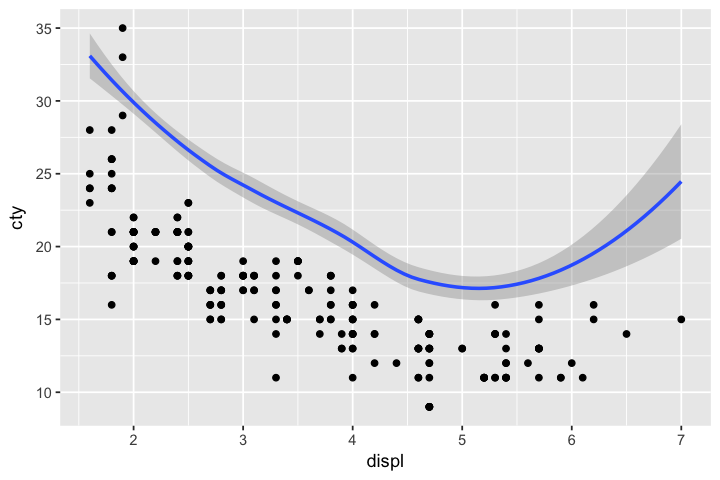

In [24]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = cty)) +
    geom_smooth(mapping = aes(x = displ, y = hwy))

A good solution to this problem is to make the x, y mappings **global**.

`geom_smooth()` using method = 'loess'


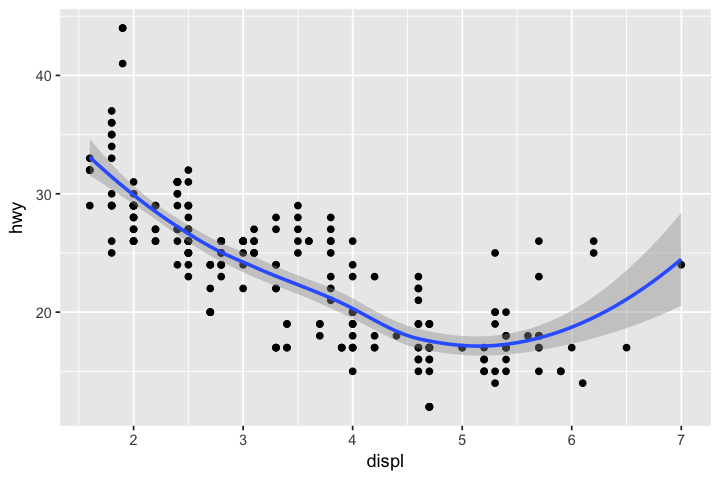

In [25]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
    geom_point() +
    geom_smooth()

We can provide additional mappings in the individual geoms.

`geom_smooth()` using method = 'loess'


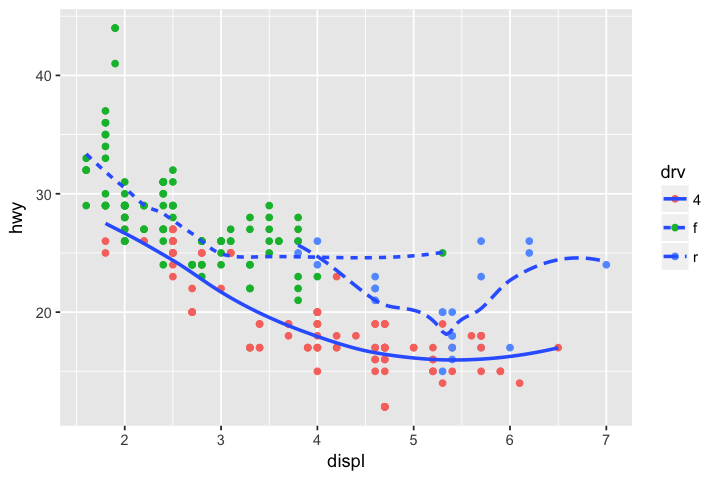

In [26]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
    geom_point(mapping = aes(color = drv)) +
    geom_smooth(mapping = aes(linetype = drv), se = FALSE) # se = FALSE supresses the confidence intervals